#📌 Extracão

In [2]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o JSON
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

# Normalizar os dados (pois está aninhado)
df = pd.json_normalize(data)
df_normalizado = df

# Visualizar as primeiras linhas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
# Verificar o formato das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformação

In [4]:
# Verificar valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [5]:
# Verificar duplicatas pelo customerID
duplicados = df.duplicated(subset='customerID').sum()
print(f'Duplicatas: {duplicados}')

Duplicatas: 0


In [6]:
# Verifica e imprime valores únicos (somente se forem 10 ou menos)
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    n_unique = len(unique_vals)

    if n_unique <= 10:
        print(f'\n📌 Coluna: {col} - {n_unique} valores únicos')
        print(unique_vals)


📌 Coluna: Churn - 3 valores únicos
['No' 'Yes' '']

📌 Coluna: customer.gender - 2 valores únicos
['Female' 'Male']

📌 Coluna: customer.SeniorCitizen - 2 valores únicos
[0 1]

📌 Coluna: customer.Partner - 2 valores únicos
['Yes' 'No']

📌 Coluna: customer.Dependents - 2 valores únicos
['Yes' 'No']

📌 Coluna: phone.PhoneService - 2 valores únicos
['Yes' 'No']

📌 Coluna: phone.MultipleLines - 3 valores únicos
['No' 'Yes' 'No phone service']

📌 Coluna: internet.InternetService - 3 valores únicos
['DSL' 'Fiber optic' 'No']

📌 Coluna: internet.OnlineSecurity - 3 valores únicos
['No' 'Yes' 'No internet service']

📌 Coluna: internet.OnlineBackup - 3 valores únicos
['Yes' 'No' 'No internet service']

📌 Coluna: internet.DeviceProtection - 3 valores únicos
['No' 'Yes' 'No internet service']

📌 Coluna: internet.TechSupport - 3 valores únicos
['Yes' 'No' 'No internet service']

📌 Coluna: internet.StreamingTV - 3 valores únicos
['Yes' 'No' 'No internet service']

📌 Coluna: internet.StreamingMovies -

In [7]:
# Converter a coluna para float, tratando erros (valores não numéricos serão convertidos em NaN)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [8]:
print(df['account.Charges.Total'].dtype)  # Deve mostrar float64
df['account.Charges.Total'].isnull().sum()  # Ver quantos valores ficaram como NaN

float64


np.int64(11)

In [9]:
mediana_total = df['account.Charges.Total'].median()
df['account.Charges.Total'].fillna(mediana_total, inplace=True)

/tmp/ipython-input-9-2934124515.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(mediana_total, inplace=True)


In [10]:
df['account.Charges.Total'].isnull().sum()  # Deve mostrar 0

np.int64(0)

In [11]:
df_original = df.copy()

In [12]:
df.replace('', pd.NA, inplace=True)
df.dropna(inplace=True)
# Identificar as linhas removidas
linhas_removidas = df_original[~df_original.index.isin(df.index)]

# Exibir
print(f"Total de linhas removidas: {len(linhas_removidas)}")
linhas_removidas

Total de linhas removidas: 224


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [13]:
print("Número de linhas após apagar linhas vazias no 'Churn':", len(df_original))


Número de linhas após apagar linhas vazias no 'Churn': 7267


In [14]:
# Yes e No para 1 e 0
for col in df.columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))


df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [15]:
# traduzindo colunas

df_final = df.rename(columns={
    'customerID': 'ID do Cliente',
    'Churn': 'Cancelamento',
    'customer.gender': 'Gênero do Cliente',
    'customer.SeniorCitizen': 'Cliente Idoso',
    'customer.Partner': 'Possui Cônjuge',
    'customer.Dependents': 'Possui Dependentes',
    'customer.tenure': 'Tempo de Contrato (meses)',
    'phone.PhoneService': 'Serviço de Telefonia',
    'phone.MultipleLines': 'Possui Múltiplas Linhas Telefônicas',
    'internet.InternetService': 'Serviço de Internet',
    'internet.OnlineSecurity': 'Segurança Online',
    'internet.OnlineBackup': 'Backup Online',
    'internet.DeviceProtection': 'Proteção de Dispositivo',
    'internet.TechSupport': 'Suporte Técnico',
    'internet.StreamingTV': 'Streaming de TV',
    'internet.StreamingMovies': 'Streaming de Filmes',
    'account.Contract': 'Tipo de Contrato',
    'account.PaperlessBilling': 'Fatura Digital',
    'account.PaymentMethod': 'Método de Pagamento',
    'account.Charges.Monthly': 'Cobrança Mensal',
    'account.Charges.Total': 'Cobrança Total'
})

# Traduzindo valores das colunas

df_final['Gênero do Cliente'] = df_final['Gênero do Cliente'].apply(lambda x: 'Masculino' if x == 'Male' else 'Feminino')
df_final['Possui Múltiplas Linhas Telefônicas'] = df_final['Possui Múltiplas Linhas Telefônicas'].replace('No phone service', 'Sem serviço de telefonia')
df_final['Serviço de Internet'] = df_final['Serviço de Internet'].replace('Fiber optic', 'Fibra ótica')

for col in df_final.columns:
  df_final[col] = df_final[col].replace('No internet service', 'Sem serviço de internet')

df_final['Tipo de Contrato'] = df_final['Tipo de Contrato'].apply(lambda x: 'Mensal' if x == 'Month-to-month' else ('Bienal' if x == 'Two year' else 'Anual'))

df_final['Método de Pagamento'] = df_final['Método de Pagamento'].replace({
    'Mailed check': 'Boleto por correspondência',
    'Electronic check': 'Boleto eletrônico',
    'Credit card (automatic)': 'Cartão de crédito (automático)',
    'Bank transfer (automatic)': 'Transferência bancária (automática)'
})

df_final.head()

,ID do Cliente,Cancelamento,Gênero do Cliente,Cliente Idoso,Possui Cônjuge,Possui Dependentes,Tempo de Contrato (meses),Serviço de Telefonia,Possui Múltiplas Linhas Telefônicas,Serviço de Internet,...,Backup Online,Proteção de Dispositivo,Suporte Técnico,Streaming de TV,Streaming de Filmes,Tipo de Contrato,Fatura Digital,Método de Pagamento,Cobrança Mensal,Cobrança Total
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,1,0,1,1,0,Anual,1,Boleto por correspondência,65.6,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Mensal,0,Boleto por correspondência,59.9,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra ótica,...,0,1,0,0,0,Mensal,1,Boleto eletrônico,73.9,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra ótica,...,1,1,0,1,1,Mensal,1,Boleto eletrônico,98.0,1237.85
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra ótica,...,0,0,1,1,0,Mensal,1,Boleto por correspondência,83.9,267.40


In [16]:
# Calculando os gastos diários
df_final['Contas Diarias'] = ((df_final['Cobrança Total'] / df_final['Tempo de Contrato (meses)']) /30 ).round(2)

df_final.head()

,ID do Cliente,Cancelamento,Gênero do Cliente,Cliente Idoso,Possui Cônjuge,Possui Dependentes,Tempo de Contrato (meses),Serviço de Telefonia,Possui Múltiplas Linhas Telefônicas,Serviço de Internet,...,Proteção de Dispositivo,Suporte Técnico,Streaming de TV,Streaming de Filmes,Tipo de Contrato,Fatura Digital,Método de Pagamento,Cobrança Mensal,Cobrança Total,Contas Diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Boleto por correspondência,65.6,593.30,2.20
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensal,0,Boleto por correspondência,59.9,542.40,2.01
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra ótica,...,1,0,0,0,Mensal,1,Boleto eletrônico,73.9,280.85,2.34
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra ótica,...,1,0,1,1,Mensal,1,Boleto eletrônico,98.0,1237.85,3.17
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra ótica,...,0,1,1,0,Mensal,1,Boleto por correspondência,83.9,267.40,2.97


#📊 Carga e análise

In [17]:
map_traducao = {
    'count': 'Contagem',
    'mean': 'Média',
    'std': 'Desvio padrao',
    'min': 'Mínimo',
    '25%': '25 Percento',
    '50%': 'Mediana',
    '75%': '75 Percento',
    'max': 'Máximo'
}

df_final.describe().T.rename(columns=map_traducao)

,Contagem,Média,Desvio padrao,Mínimo,25 Percento,Mediana,75 Percento,Máximo
Cancelamento,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00
Cliente Idoso,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Possui Cônjuge,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Possui Dependentes,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
Tempo de Contrato (meses),7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
Serviço de Telefonia,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
Fatura Digital,7043.0,0.592219,0.491457,0.00,0.000,1.00,1.00,1.00
Cobrança Mensal,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
Cobrança Total,7043.0,2281.906815,2265.274362,18.80,402.225,1394.55,3786.60,8684.80
Contas Diarias,7043.0,inf,NaN,0.46,1.210,2.35,3.01,inf


In [18]:
#Definir as cores
cores = ['#aecbe9', '#ecb697', '#C8A2C8', '#B2FBA5']
#Tamanho da figura
tamanho = (12, 6)
#Labels de evasão
labels = ['Permaneceu', 'Saiu']

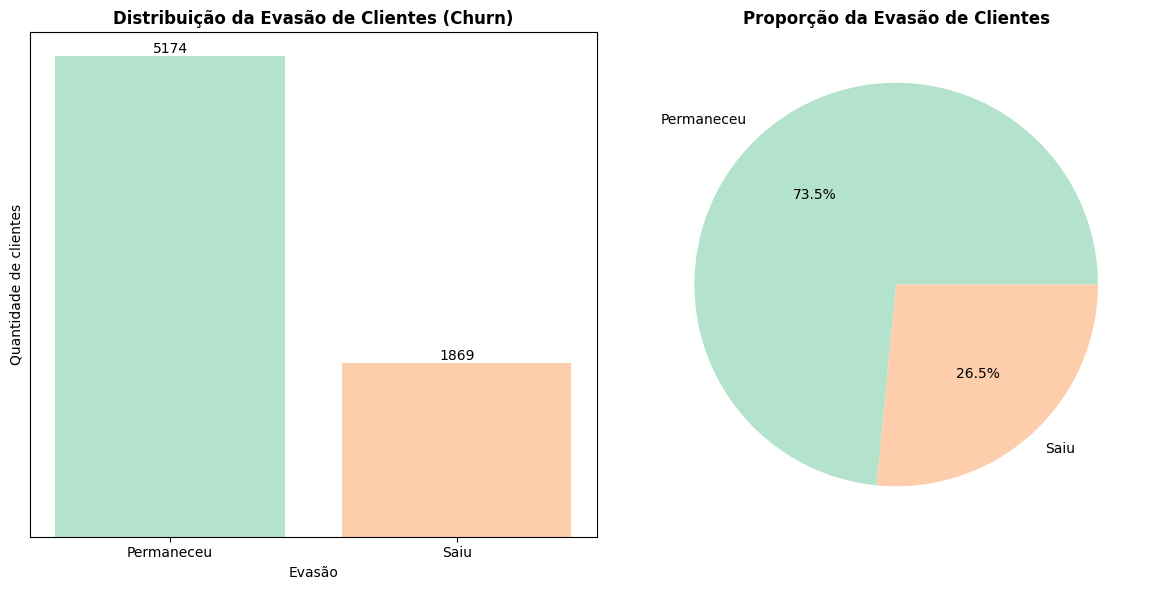

In [19]:
# Plotando gráficos do Churn

contagem_evasao = df_final['Cancelamento'].value_counts()
cores = plt.cm.Pastel2(range(len(contagem_evasao)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

# Gráfico de barras
barras = ax1.bar(labels, contagem_evasao.values, color=cores)
ax1.set_title('Distribuição da Evasão de Clientes (Churn)', fontweight='bold')
ax1.set_xlabel('Evasão')
ax1.set_ylabel('Quantidade de clientes')
ax1.set_yticks([])


for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

# Gráfico de setores
ax2.pie(contagem_evasao.values, labels=labels, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção da Evasão de Clientes', fontweight='bold')

plt.tight_layout()
plt.show()

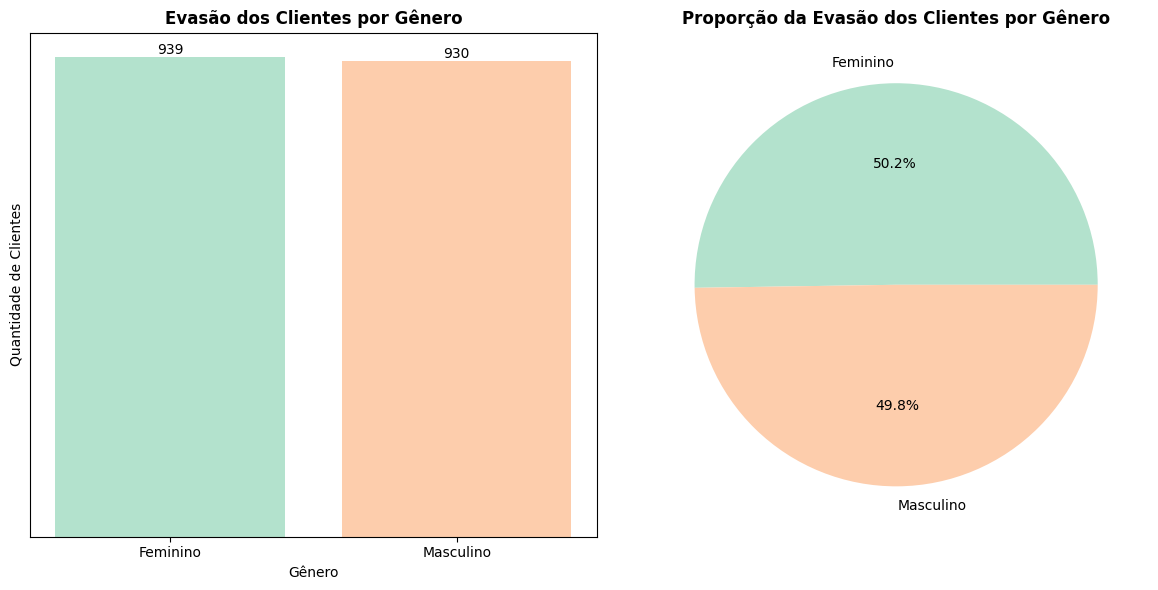

In [20]:
df_churn = df_final[df_final['Cancelamento'] == 1]

genero = df_churn['Gênero do Cliente'].value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))
ax1.bar(genero.index, genero.values, color=cores)
ax1.set_title('Evasão dos Clientes por Gênero', fontweight='bold')
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(genero.values, labels=genero.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção da Evasão dos Clientes por Gênero', fontweight='bold')

plt.tight_layout()
plt.show()


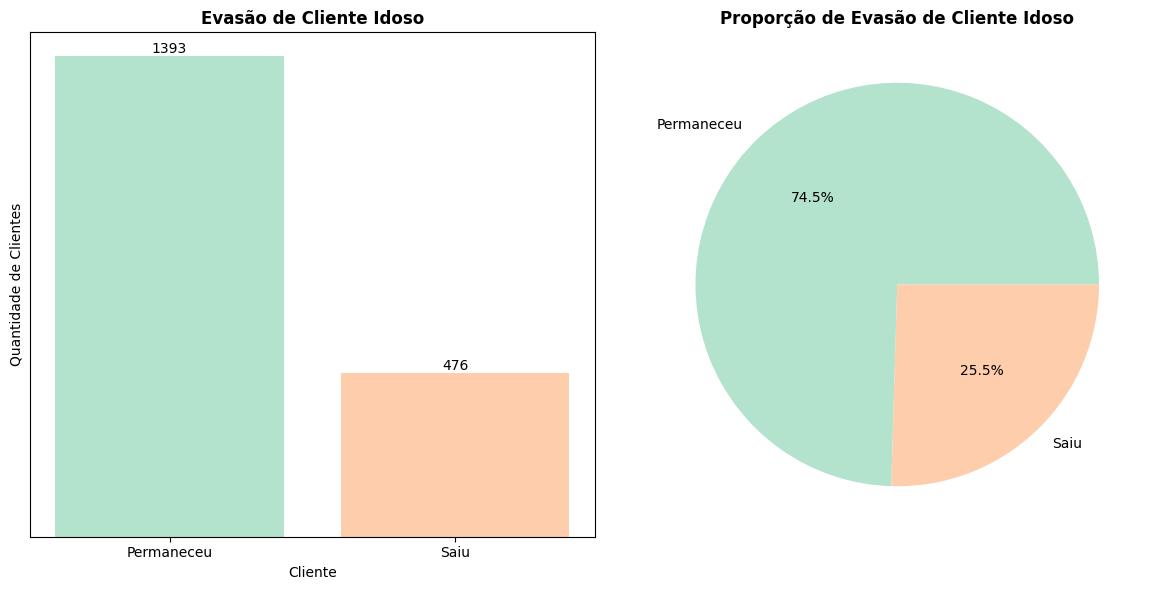

In [21]:
idoso = df_churn['Cliente Idoso'].replace({0: 'Não', 1: 'Sim'}).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(labels, idoso.values, color=cores)
ax1.set_title('Evasão de Cliente Idoso', fontweight='bold')
ax1.set_xlabel('Cliente')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(idoso.values, labels=labels, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão de Cliente Idoso', fontweight='bold')

plt.tight_layout()
plt.show()

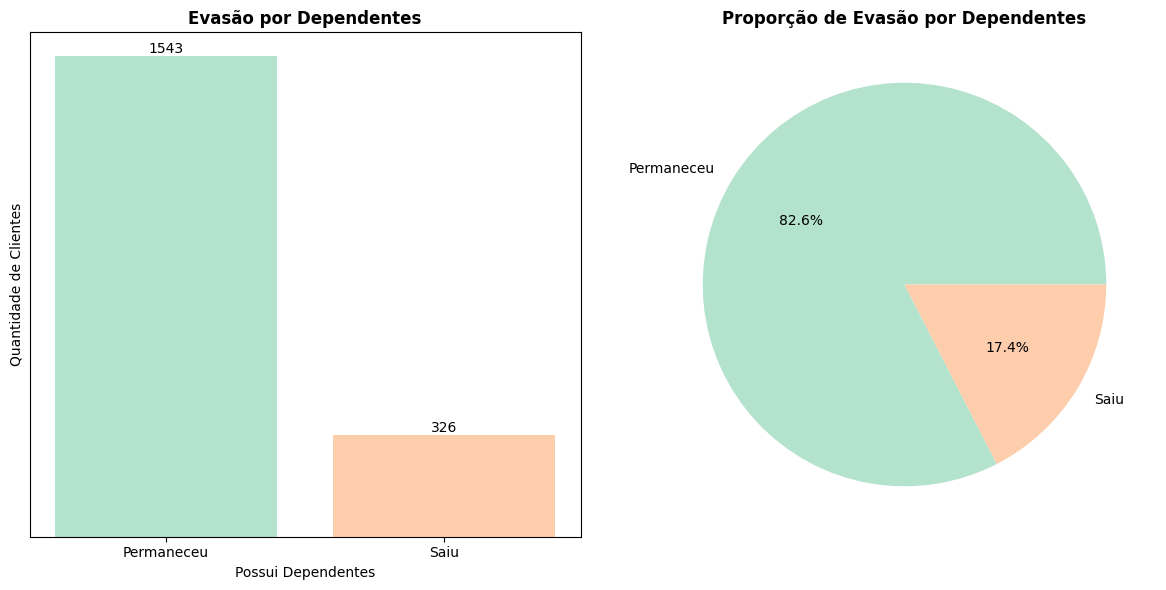

In [22]:
dependentes = df_churn['Possui Dependentes'].replace({0: 'Não', 1: 'Sim'}).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(labels, dependentes.values, color=cores)
ax1.set_title('Evasão por Dependentes', fontweight='bold')
ax1.set_xlabel('Possui Dependentes')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(dependentes.values, labels=labels, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Dependentes', fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
#Definir as cores
cores = ['#aecbe9', '#ecb697', '#C8A2C8', '#B2FBA5']
#Tamanho da figura
tamanho = (12, 6)
#Labels de evasão
labels = ['Permaneceu', 'Saiu']

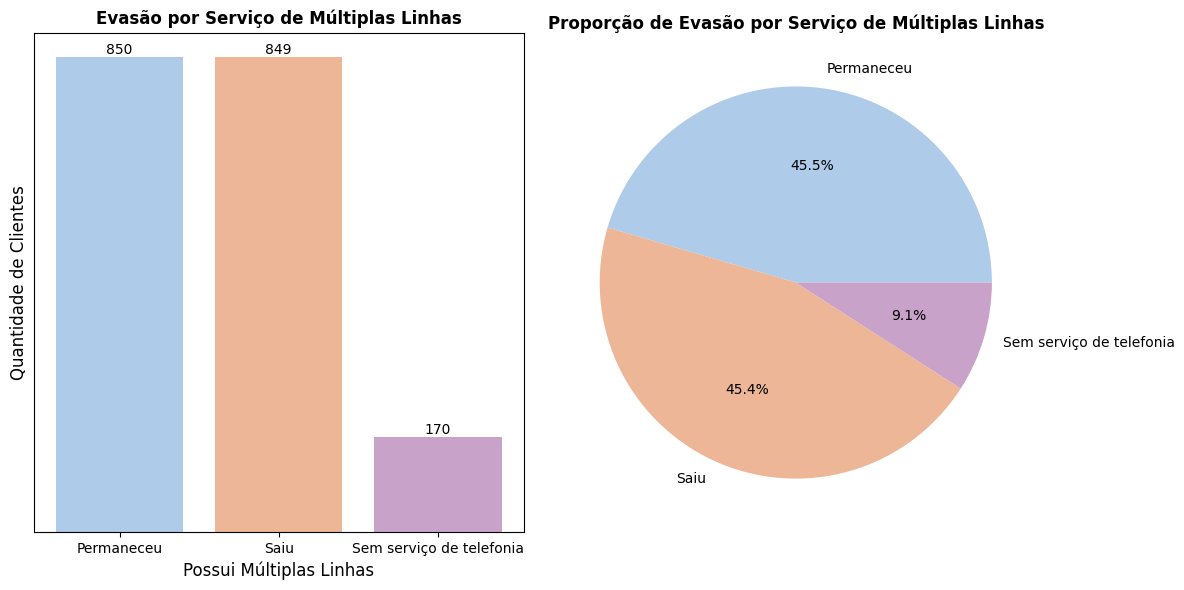

In [24]:
multipla = df_churn['Possui Múltiplas Linhas Telefônicas'].replace({0: 'Saiu', 1: 'Permaneceu'}).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

barras = ax1.bar(multipla.index, multipla.values, color=cores)

ax1.set_title('Evasão por Serviço de Múltiplas Linhas', fontweight='bold')
ax1.set_xlabel('Possui Múltiplas Linhas', fontsize=12)
ax1.set_ylabel('Quantidade de Clientes', fontsize=12)
ax1.set_yticks([])
ax1.bar_label(barras, fmt='%d')


ax2.pie(multipla.values, labels=multipla.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Serviço de Múltiplas Linhas', fontweight='bold')



plt.tight_layout()
plt.show()

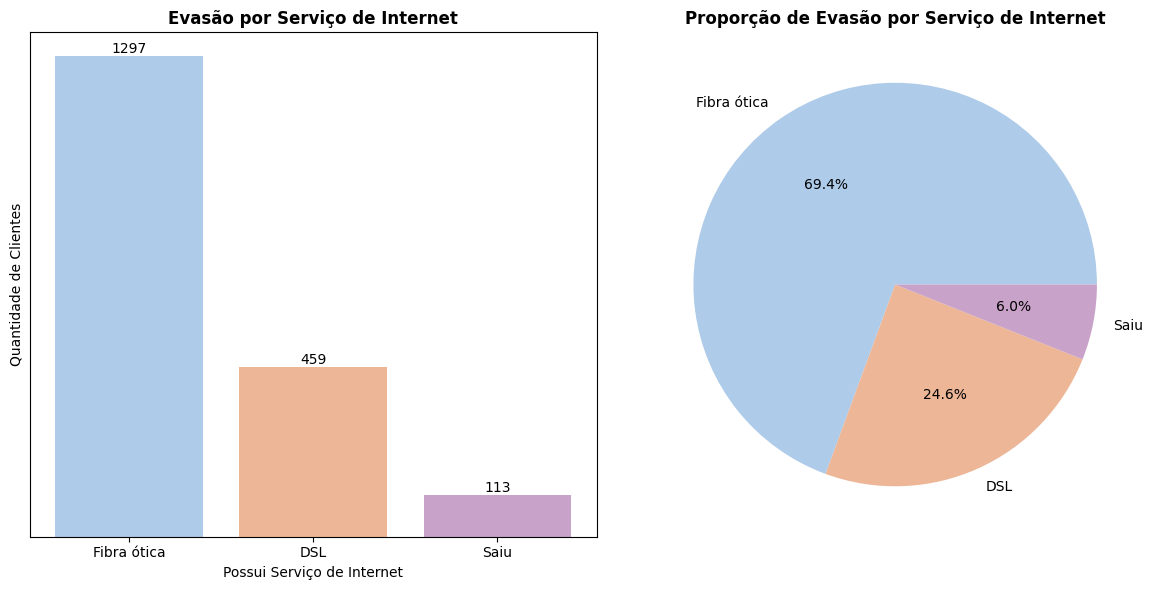

In [25]:
internet = df_churn['Serviço de Internet'].replace({0: 'Saiu', 1: 'Permaneceu'}).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(internet.index, internet.values, color=cores)
ax1.set_title('Evasão por Serviço de Internet', fontweight='bold')
ax1.set_xlabel('Possui Serviço de Internet')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(internet.values, labels=internet.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Serviço de Internet', fontweight='bold')

plt.tight_layout()
plt.show()

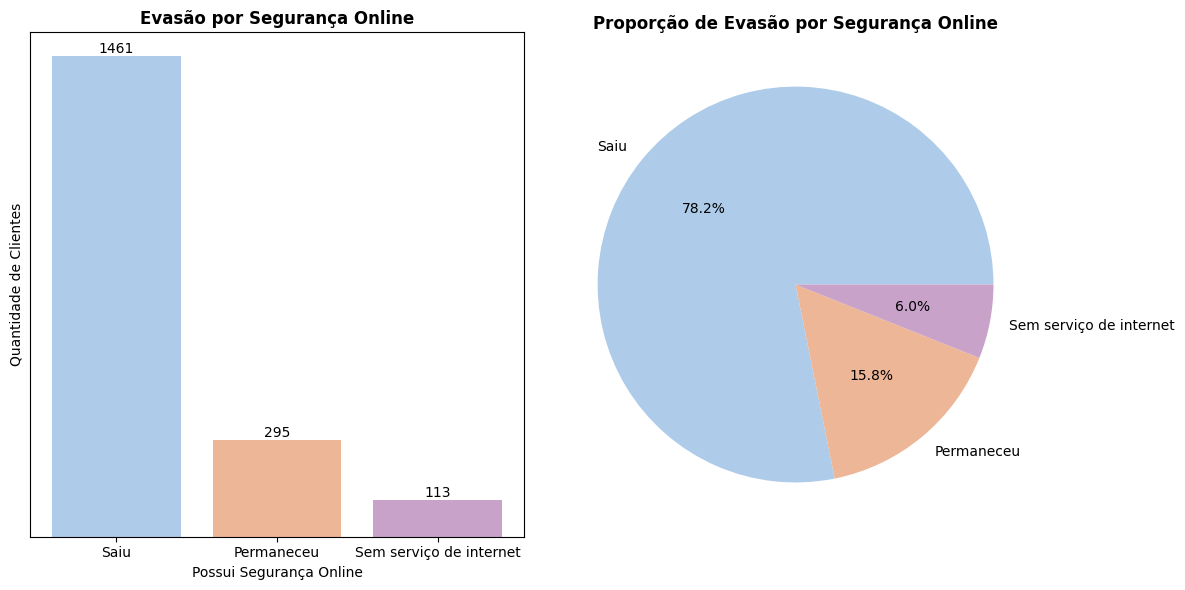

In [26]:
seguranca_online = df_churn['Segurança Online'].replace({0: 'Saiu', 1: 'Permaneceu'}).value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(seguranca_online.index, seguranca_online.values, color=cores)
ax1.set_title('Evasão por Segurança Online', fontweight='bold')
ax1.set_xlabel('Possui Segurança Online')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(seguranca_online.values, labels=seguranca_online.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Segurança Online', fontweight='bold')

plt.tight_layout()
plt.show()

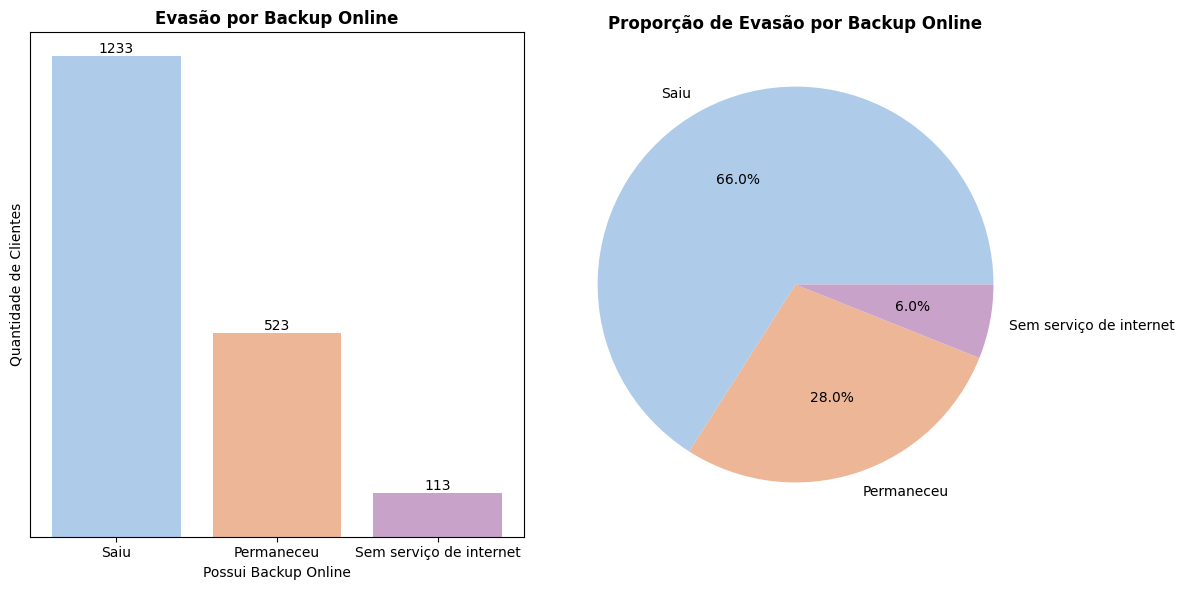

In [27]:
backup = df_churn['Backup Online'].replace({0: 'Saiu', 1: 'Permaneceu'}).value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(backup.index, backup.values, color=cores)
ax1.set_title('Evasão por Backup Online', fontweight='bold')
ax1.set_xlabel('Possui Backup Online')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(backup.values, labels=backup.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Backup Online', fontweight='bold')

plt.tight_layout()
plt.show()

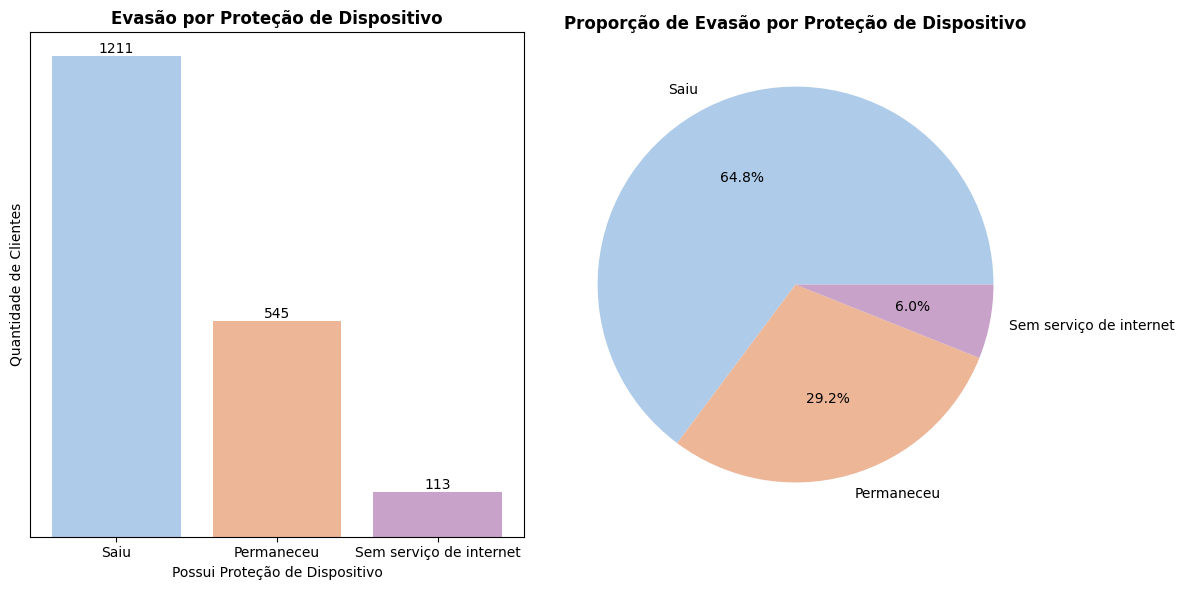

In [28]:
protecao = df_churn['Proteção de Dispositivo'].replace({0: 'Saiu', 1: 'Permaneceu'}).value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(protecao.index, protecao.values, color=cores)
ax1.set_title('Evasão por Proteção de Dispositivo', fontweight='bold')
ax1.set_xlabel('Possui Proteção de Dispositivo')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(protecao.values, labels=protecao.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Proteção de Dispositivo', fontweight='bold')

plt.tight_layout()
plt.show()

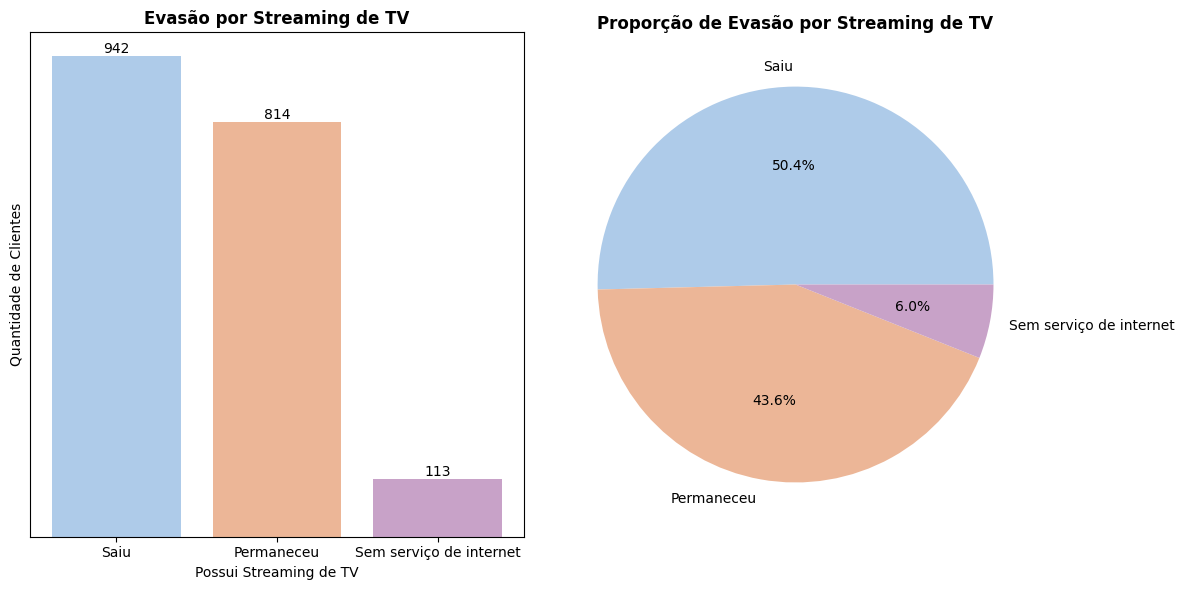

In [29]:
streaming_tv = df_churn['Streaming de TV'].replace({0: 'Saiu', 1: 'Permaneceu'}).value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(streaming_tv.index, streaming_tv.values, color=cores)
ax1.set_title('Evasão por Streaming de TV', fontweight='bold')
ax1.set_xlabel('Possui Streaming de TV')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(streaming_tv.values, labels=streaming_tv.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Streaming de TV', fontweight='bold')

plt.tight_layout()
plt.show()

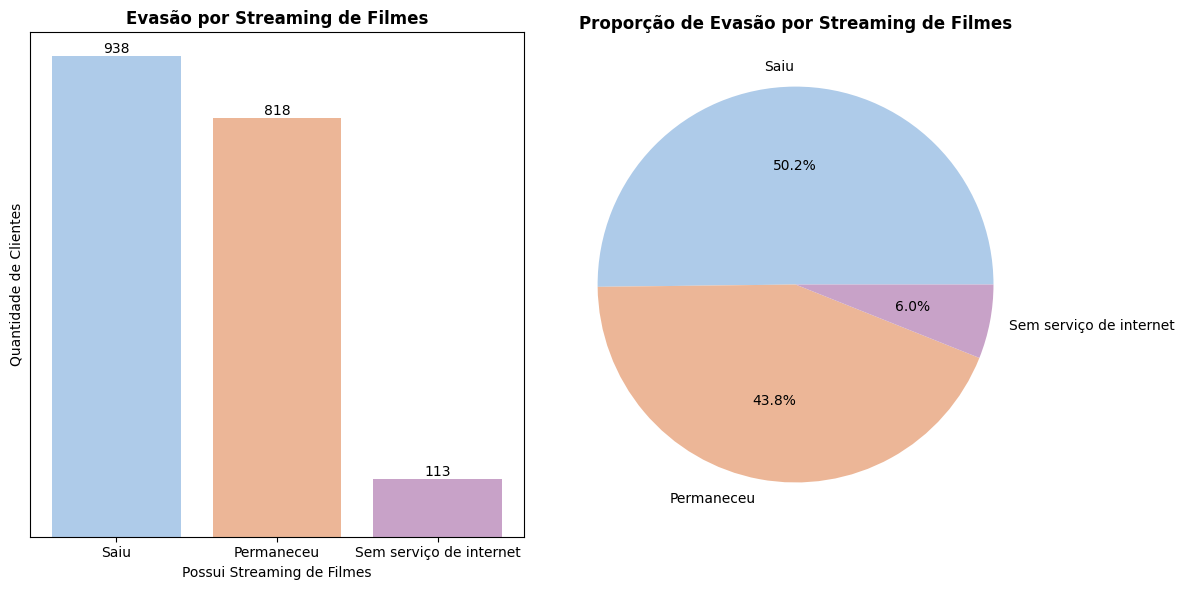

In [30]:
streaming_filmes = df_churn['Streaming de Filmes'].replace({0: 'Saiu', 1: 'Permaneceu'}).value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(streaming_filmes.index, streaming_filmes.values, color=cores)
ax1.set_title('Evasão por Streaming de Filmes', fontweight='bold')
ax1.set_xlabel('Possui Streaming de Filmes')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(streaming_filmes.values, labels=streaming_filmes.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Streaming de Filmes', fontweight='bold')

plt.tight_layout()
plt.show()

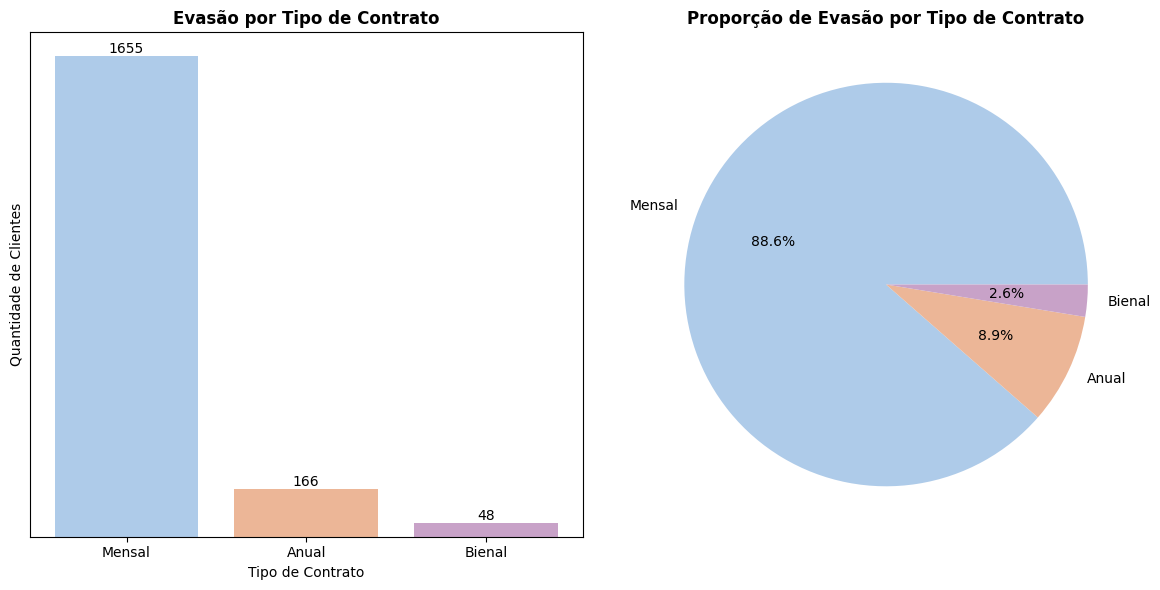

In [31]:
contrato = df_churn['Tipo de Contrato'].value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(contrato.index, contrato.values, color=cores)
ax1.set_title('Evasão por Tipo de Contrato', fontweight='bold')
ax1.set_xlabel('Tipo de Contrato')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(contrato.values, labels=contrato.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Tipo de Contrato', fontweight='bold')

plt.tight_layout()
plt.show()

In [32]:
#Definir as cores
cores = ['#aecbe9', '#ecb697', '#C8A2C8', '#B2FBA5']
#Tamanho da figura
tamanho = (12, 6)
#Labels de evasão
labels = ['Permaneceu', 'Saiu']

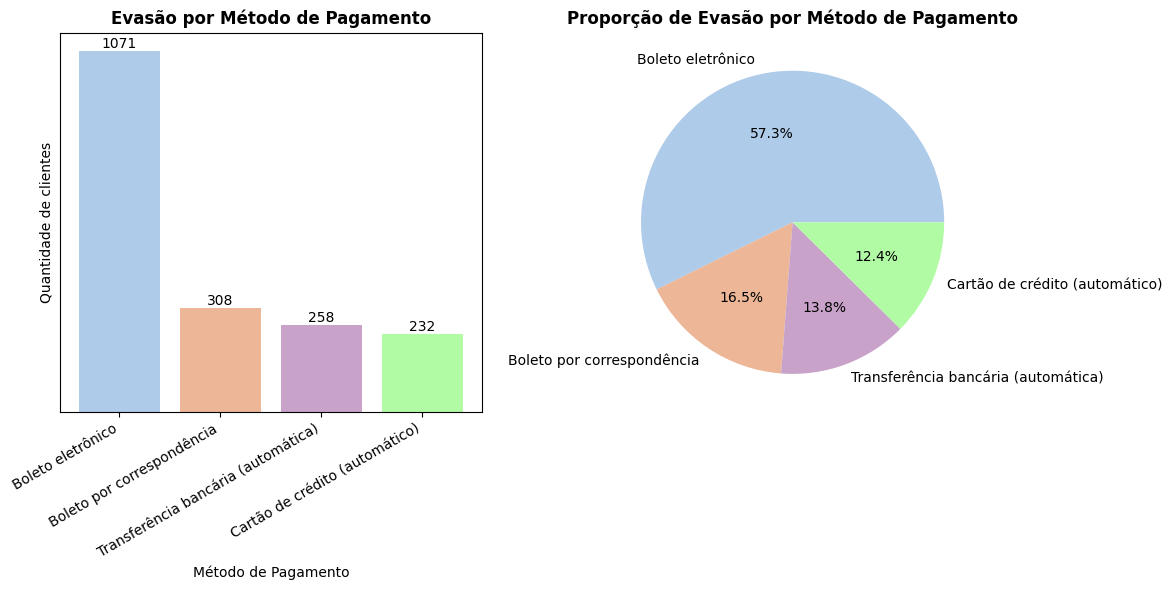

In [33]:
pagamento = df_churn['Método de Pagamento'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(tamanho))

ax1.bar(range(len(pagamento)), pagamento.values, color=cores)
ax1.set_title('Evasão por Método de Pagamento', fontweight='bold')
ax1.set_xlabel('Método de Pagamento')
ax1.set_ylabel('Quantidade de clientes')
ax1.set_yticks([])

ax1.set_xticks(range(len(pagamento)))
ax1.set_xticklabels(pagamento.index, rotation=30, ha='right')


for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')

ax2.pie(pagamento.values, labels=pagamento.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Método de Pagamento', fontweight='bold')

plt.tight_layout()
plt.show()

In [34]:
df['Churn'] = df['Churn'].replace({0: 'Permaneceu', 1: 'Saiu'})

def plot_box_churn(df, y_col, y_label, title):
    """
    Cria um boxplot comparando uma variável numérica com Churn (Permaneceu/Saiu),
    com estilo visual padronizado.

    Parâmetros:
    - df: DataFrame
    - y_col: nome da coluna numérica
    - y_label: rótulo do eixo Y (ex: "Tempo de Contrato (meses)")
    - title: título do gráfico
    """
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(data=df, x='Churn', y=y_col,
                     palette={'Permaneceu':'#aecbe9', 'Saiu':'#ecb697'})

    plt.title(title)
    plt.xlabel('Situação do Cliente')

    ax.set_ylabel(y_label)
    ax.set_yticks([])

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-34-2777835859.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn', y=y_col,


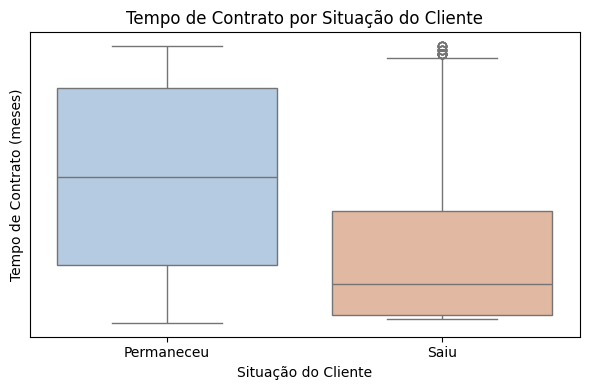

In [35]:
plot_box_churn(df, 'customer.tenure', 'Tempo de Contrato (meses)', 'Tempo de Contrato por Situação do Cliente')


/tmp/ipython-input-34-2777835859.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn', y=y_col,


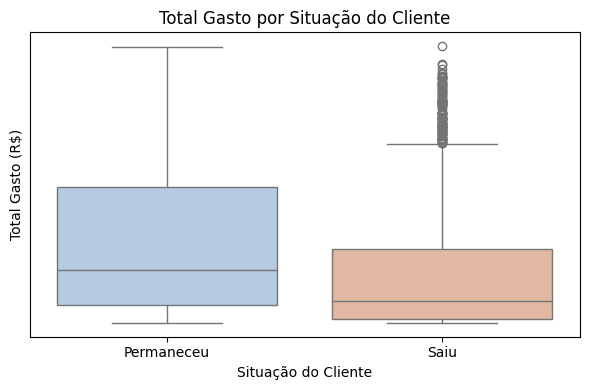

In [36]:

plot_box_churn(df, 'account.Charges.Total', 'Total Gasto (R$)', 'Total Gasto por Situação do Cliente')


/tmp/ipython-input-34-2777835859.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn', y=y_col,


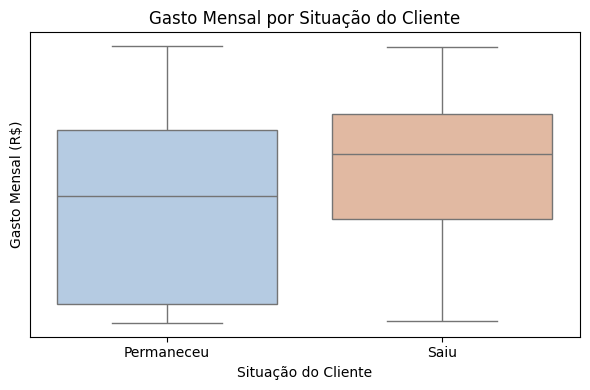

In [37]:
plot_box_churn(df, 'account.Charges.Monthly', 'Gasto Mensal (R$)', 'Gasto Mensal por Situação do Cliente')


#📄Relatorio Final

🧭 1. Introdução

O presente projeto tem como objetivo analisar a evasão de clientes (churn) de uma empresa de telecomunicações. A evasão ocorre quando um cliente cancela seu contrato com a empresa, e entender os motivos desse comportamento é fundamental para desenvolver estratégias de retenção.

Com base em um conjunto de dados fornecido, exploramos características dos clientes e serviços contratados para identificar padrões que se associam a maiores taxas de cancelamento.

🧹Limpeza e Tratamento de Dados

Foram realizados os seguintes passos para garantir a qualidade dos dados:

Importação e normalização dos dados JSON: Os dados foram extraídos de um arquivo JSON e convertidos em um DataFrame do Pandas, facilitando a manipulação e a análise estruturada.

Identificação e remoção de dados ausentes e inconsistentes: Linhas com informações faltantes ou inválidas foram removidas para garantir que a análise fosse precisa e não enviesada.

Conversão de formatos e variáveis categóricas: Valores textuais como "Sim" e "Não" foram convertidos para formato binário (1 e 0), e outras colunas foram ajustadas para seus tipos apropriados.

Criação da coluna "Contas Diárias": Foi criada uma nova variável para representar o gasto diário dos clientes, dividindo o valor total (Charges.Total) pela quantidade de meses de contrato (tenure), a fim de identificar padrões de comportamento financeiro.

Tradução e padronização dos dados: As colunas e seus valores foram traduzidos para o português para tornar os resultados mais acessíveis. Também foi feita a padronização de rótulos em variáveis categóricas, como a conversão de "Male" para "Masculino" e "Female" para "Feminino".


🔍Análise Exploratória de Dados

Com os dados devidamente tratados, foi realizada uma análise exploratória com o objetivo de identificar padrões de comportamento e fatores associados à evasão (Churn). As principais análises e visualizações realizadas foram:

Distribuição da Evasão (Churn):
A análise inicial examinou a proporção de clientes que cancelaram o serviço em relação aos que permaneceram. Essa visão geral permitiu dimensionar o problema e serviu de base para aprofundamentos posteriores.

Análises por Perfil Demográfico:
Foram gerados gráficos para avaliar a evasão com base em características dos clientes, como:

Gênero, Faixa etária (idosos ou não), Presença de dependentes.

Essas comparações ajudaram a entender se determinados grupos apresentam maior propensão ao cancelamento.

Análises por Perfil Contratual e de Serviço:
Exploramos também o churn em relação a:

Tipo de contrato, Método de pagamento, Tipo de serviço de internet, Gasto mensal e tempo de permanência (tenure).

Tipos de Gráficos Utilizados:

Gráficos de barras verticais: para comparar contagens absolutas entre grupos.

Gráficos de setores (pizza): para ilustrar proporções de churn.

Boxplots: para visualizar a distribuição de variáveis numéricas por grupo (ex: gasto mensal por churn).

Histograma e violino (opcional): para verificar concentração e dispersão de valores.

Essas visualizações possibilitaram a identificação de tendências importantes e diferenças marcantes entre os perfis de clientes que permanecem e os que cancelam os serviços.

✅Conclusões e Insights

Com base nas análises realizadas, podemos destacar os seguintes pontos:

A maioria dos clientes permanece, mas uma parte relevante ainda cancela o serviço.

Clientes com contratos mensais apresentam taxas significativamente maiores de evasão.

A forma de pagamento influencia no churn: quem paga via cartão eletrônico tende a sair mais.

Clientes que ficam menos tempo na empresa (tenure baixo) cancelam com mais frequência.

Clientes com gastos mensais mais altos também demonstram maior propensão ao cancelamento.

💡Recomendações

Com base nos padrões identificados, recomendamos:

Incentivar contratos de longo prazo, oferecendo benefícios e descontos.

Acompanhar de perto os novos clientes (primeiros meses), oferecendo suporte proativo.

Analisar criticamente planos com valores mensais mais altos, verificando se há insatisfação com custo-benefício.

Focar em retenção personalizada para clientes com perfil de risco (contrato mensal + pagamento eletrônico + tenure baixo).

Aplicar modelos preditivos com base nos dados para prever e agir preventivamente em potenciais casos de churn.